## Data Loading and Analysis

In [1]:
# Import libraries that will be needed for the lab

import xgboost as xgb
import numpy as np
from collections import OrderedDict
import gc
from glob import glob
import os
import pandas as pd
from copy import copy
from time import time
from sklearn.metrics import roc_auc_score,confusion_matrix,accuracy_score,classification_report,roc_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder # type: ignore
from timeit import default_timer
import matplotlib.pyplot as plt # type: ignore
import pickle

# Set the seed for numpy
np.random.seed(123)

# Display all columns of Pandas' dataframes by default
pd.set_option('display.max_columns', None)

DATA_PATH = os.path.join(os.getcwd(),'myfiles/data/kddcup.data.corrected')


col_names = ["duration","protocol_type","service","flag","src_bytes","dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins","logged_in",
             "num_compromised","root_shell","su_attempted","num_root","num_file_creations","num_shells","num_access_files","num_outbound_cmds",
             "is_host_login","is_guest_login","count","srv_count","serror_rate","srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
             "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count","dst_host_same_srv_rate","dst_host_diff_srv_rate",
             "dst_host_same_src_port_rate","dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate","dst_host_rerror_rate",
             "dst_host_srv_rerror_rate","label"]

df =  pd.read_csv(DATA_PATH, header=None, names=col_names, index_col=False)

# Display the first few rows of the dataset
df.head(5)

C:\Users\arun8\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,215,45076,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,162,4528,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,236,1228,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,233,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3,3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,normal.


### Visualizations

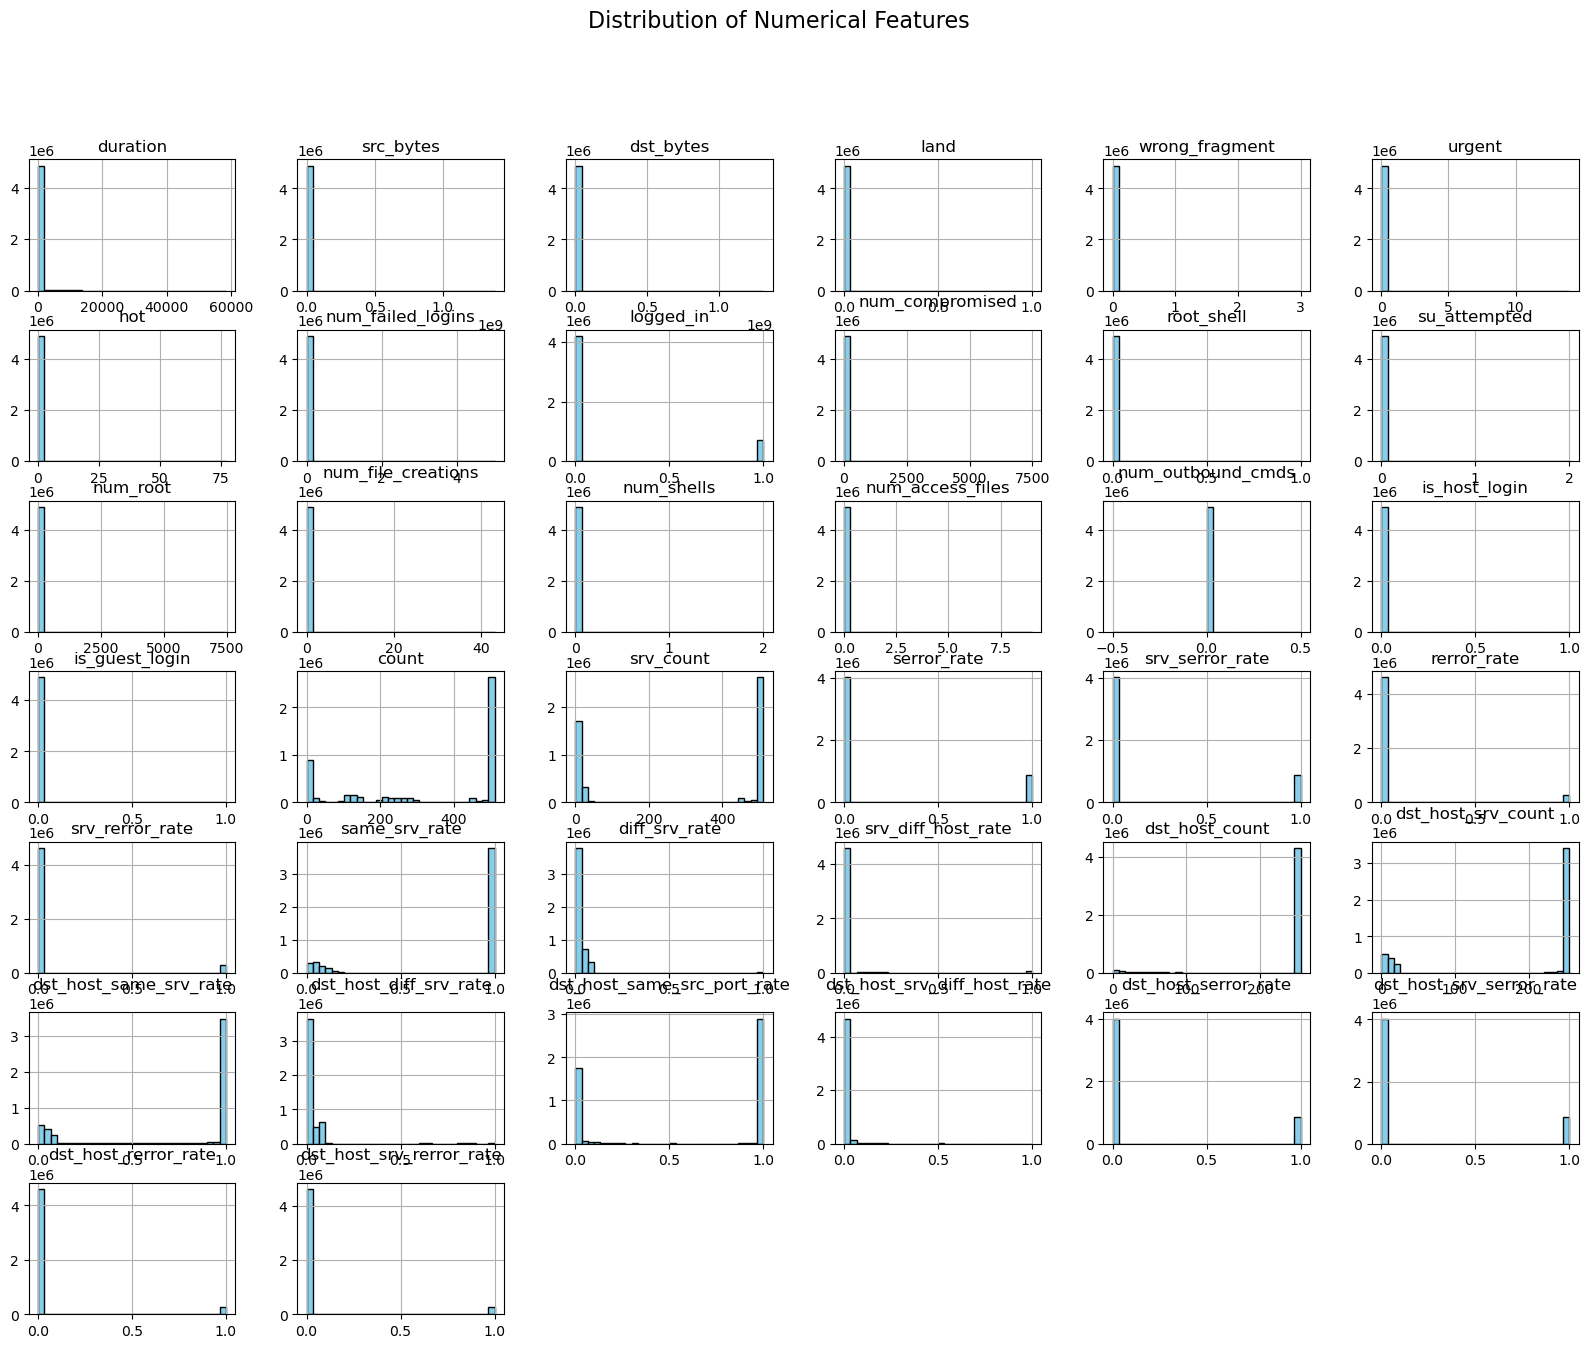

In [ ]:
import matplotlib.pyplot as plt

# Select numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Plot histograms for numerical columns to check there count and distribution values
df[numerical_columns].hist(bins=30, figsize=(20, 15), color='skyblue', edgecolor='black')
plt.suptitle('Distribution of Numerical Features', fontsize=16)
plt.show()

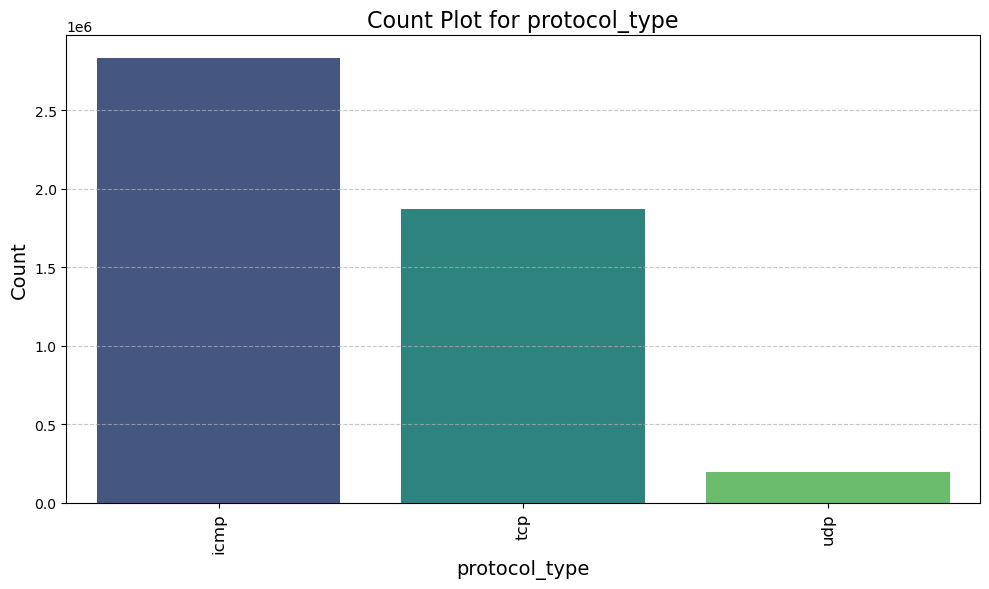

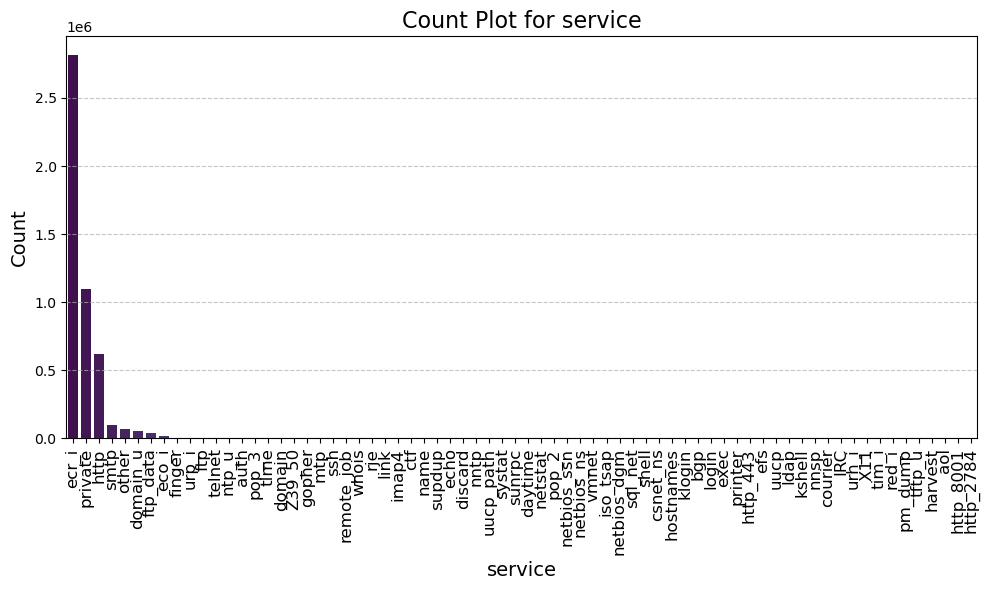

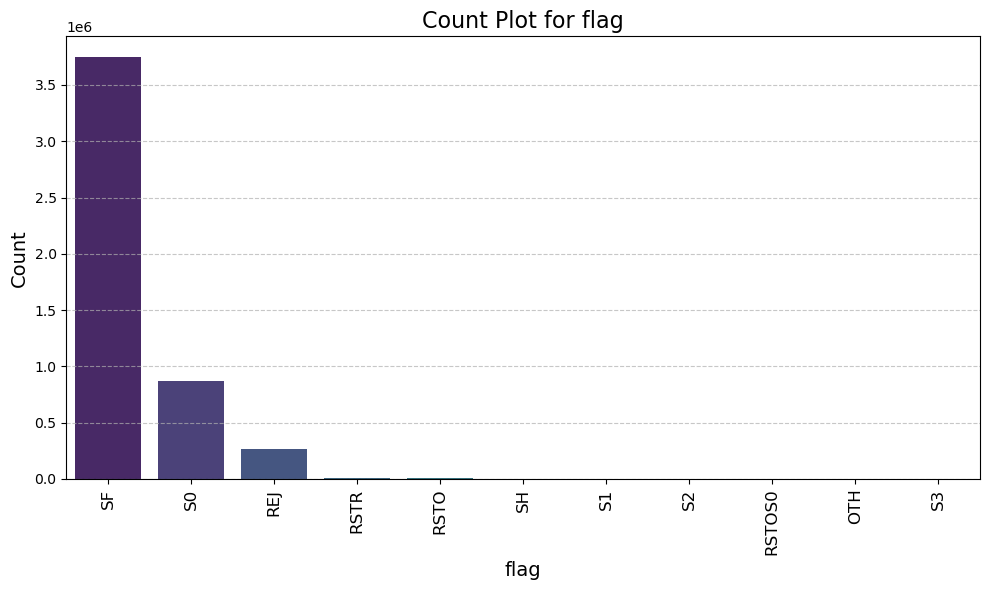

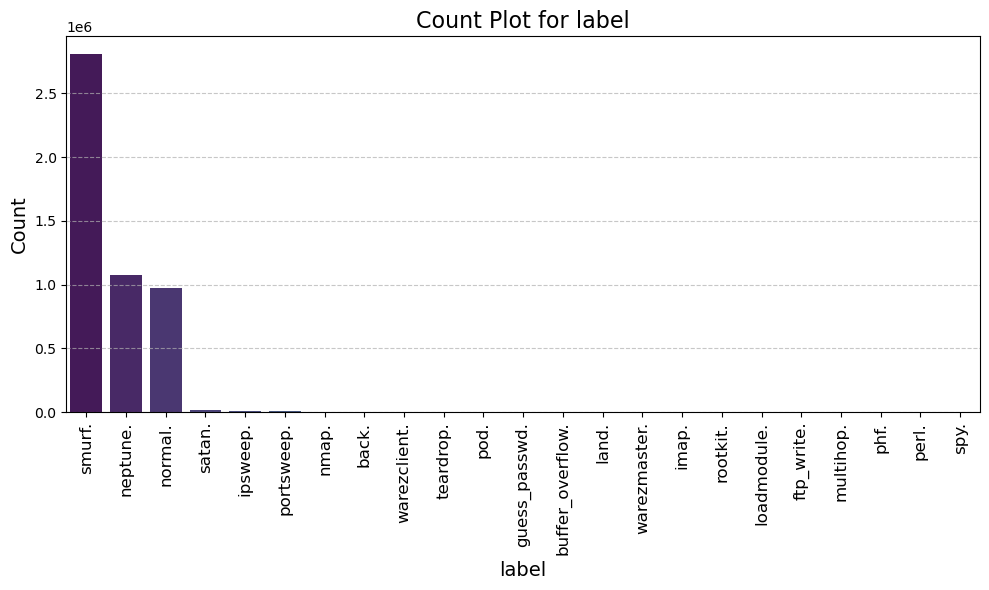

In [3]:
import seaborn as sns

categorical_columns = ['protocol_type', 'service', 'flag', 'label']

# Plot count plots for categorical columns
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='viridis')
    plt.title(f'Count Plot for {col}', fontsize=16)
    plt.xlabel(col, fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.xticks(rotation=90, fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

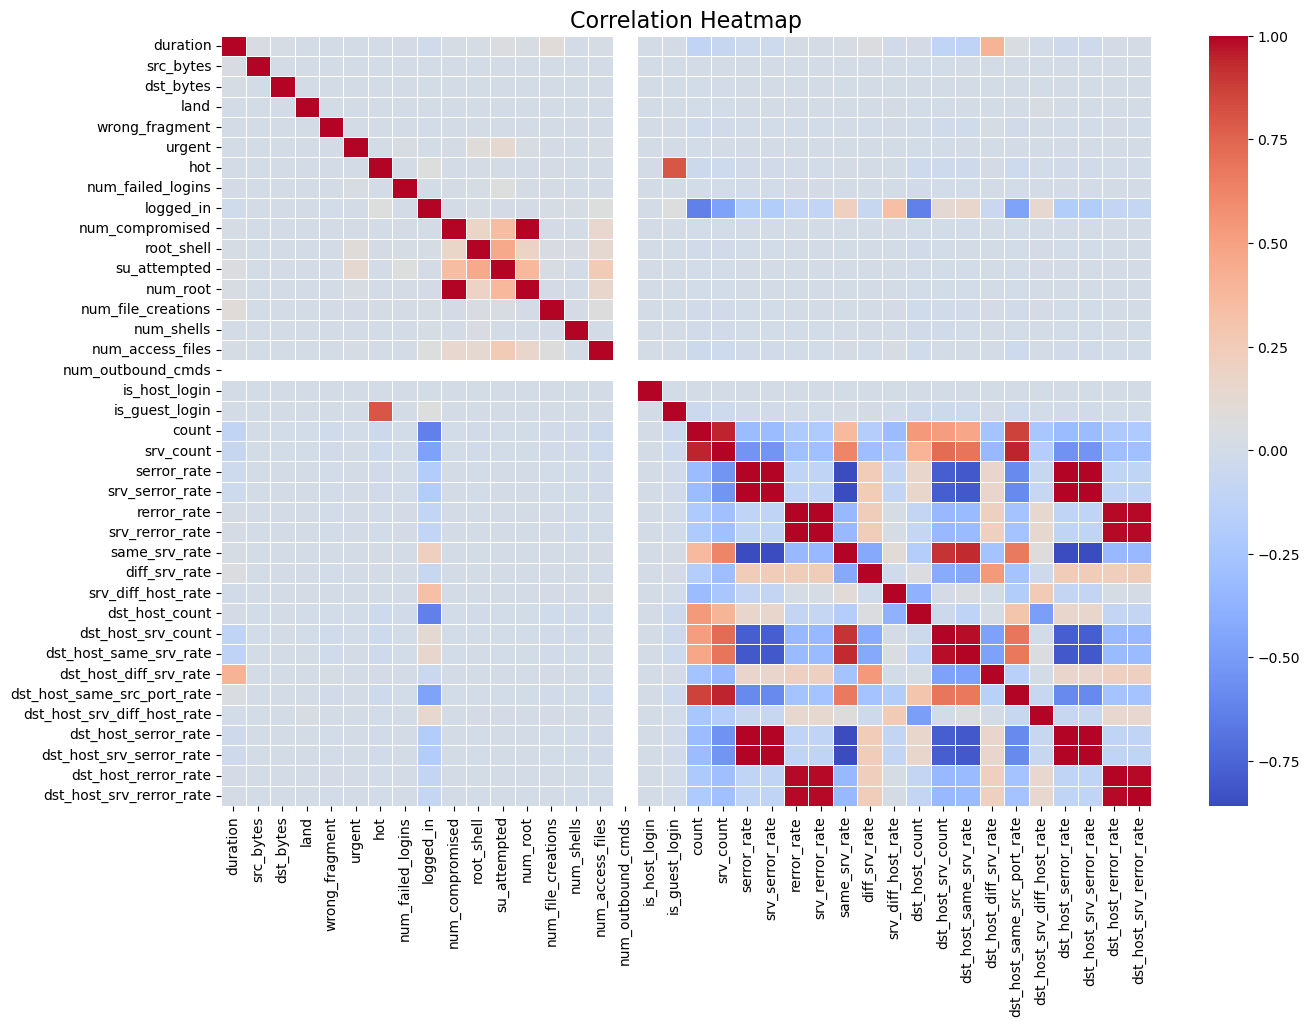

In [ ]:
# Heatmap shows a considerable corelation between columns where same signal characterstics are realted to each other we can drop those columns

drop_columns = ['srv_count',]
df.drop()

# Compute correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

## Encoding lables

In [5]:
#Mapping labels to integers for model training
le = LabelEncoder()
le.fit(df.label)
print(le.classes_)

['back.' 'buffer_overflow.' 'ftp_write.' 'guess_passwd.' 'imap.'
 'ipsweep.' 'land.' 'loadmodule.' 'multihop.' 'neptune.' 'nmap.' 'normal.'
 'perl.' 'phf.' 'pod.' 'portsweep.' 'rootkit.' 'satan.' 'smurf.' 'spy.'
 'teardrop.' 'warezclient.' 'warezmaster.']


## Encoding Variables

In [6]:
#Handling Categorical Data
cat_vars = ['protocol_type', 'service', 'flag', 'land', 'logged_in','is_host_login', 'is_guest_login']

# find unique labels for each category
cat_data = pd.get_dummies(df[cat_vars])

# check that the categorical variables were created correctly
cat_data.head()

,land,logged_in,is_host_login,is_guest_login,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,service_daytime,service_discard,service_domain,service_domain_u,service_echo,service_eco_i,service_ecr_i,service_efs,service_exec,service_finger,service_ftp,service_ftp_data,service_gopher,service_harvest,service_hostnames,service_http,service_http_2784,service_http_443,service_http_8001,service_imap4,service_iso_tsap,service_klogin,service_kshell,service_ldap,service_link,service_login,service_mtp,service_name,service_netbios_dgm,service_netbios_ns,service_netbios_ssn,service_netstat,service_nnsp,service_nntp,service_ntp_u,service_other,service_pm_dump,service_pop_2,service_pop_3,service_printer,service_private,service_red_i,service_remote_job,service_rje,service_shell,service_smtp,service_sql_net,service_ssh,service_sunrpc,service_supdup,service_systat,service_telnet,service_tftp_u,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,flag_OTH,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,1,0,0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1,0,1,0,0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,0,1,0,0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
3,0,1,0,0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
4,0,1,0,0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False


In [7]:
numeric_vars = list(set(df.columns.values.tolist()) - set(cat_vars))
numeric_vars.remove('label')
numeric_data = df[numeric_vars].copy()

# check that the numeric data has been captured accurately
numeric_data.head()

,dst_bytes,srv_diff_host_rate,hot,dst_host_srv_count,num_compromised,dst_host_count,dst_host_rerror_rate,same_srv_rate,dst_host_same_srv_rate,dst_host_srv_serror_rate,num_shells,num_access_files,srv_count,dst_host_serror_rate,root_shell,su_attempted,dst_host_srv_diff_host_rate,num_file_creations,dst_host_diff_srv_rate,num_root,count,srv_rerror_rate,num_failed_logins,wrong_fragment,num_outbound_cmds,dst_host_same_src_port_rate,rerror_rate,srv_serror_rate,src_bytes,dst_host_srv_rerror_rate,urgent,diff_srv_rate,duration,serror_rate
0,45076,0.0,0,0,0,0,0.0,1.0,0.0,0.0,0,0,1,0.0,0,0,0.0,0,0.0,0,1,0.0,0,0,0,0.00,0.0,0.0,215,0.0,0,0.0,0,0.0
1,4528,0.0,0,1,0,1,0.0,1.0,1.0,0.0,0,0,2,0.0,0,0,0.0,0,0.0,0,2,0.0,0,0,0,1.00,0.0,0.0,162,0.0,0,0.0,0,0.0
2,1228,0.0,0,2,0,2,0.0,1.0,1.0,0.0,0,0,1,0.0,0,0,0.0,0,0.0,0,1,0.0,0,0,0,0.50,0.0,0.0,236,0.0,0,0.0,0,0.0
3,2032,0.0,0,3,0,3,0.0,1.0,1.0,0.0,0,0,2,0.0,0,0,0.0,0,0.0,0,2,0.0,0,0,0,0.33,0.0,0.0,233,0.0,0,0.0,0,0.0
4,486,0.0,0,4,0,4,0.0,1.0,1.0,0.0,0,0,3,0.0,0,0,0.0,0,0.0,0,3,0.0,0,0,0,0.25,0.0,0.0,239,0.0,0,0.0,0,0.0


In [8]:
# concat numeric and the encoded categorical variables
numeric_cat_data = pd.concat([numeric_data, cat_data], axis=1)

# here we do a quick sanity check that the data has been concatenated correctly by checking the dimension of the vectors
print(cat_data.shape)
print(numeric_data.shape)
print(numeric_cat_data.shape)

(4898431, 88)
(4898431, 34)
(4898431, 122)


## Processing data for training

In [9]:
# capture the labels
labels = df['label'].copy()

# convert labels to integers
integer_labels = le.transform(labels)

# split data into test and train
x_train, x_test, y_train, y_test = train_test_split(numeric_cat_data,
                                                    integer_labels,
                                                    test_size=.25, 
                                                    random_state=42)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3673823, 122)
(3673823,)
(1224608, 122)
(1224608,)


In [10]:
def convert_label_to_binary(label_encoder, labels):
    normal_idx = np.where(label_encoder.classes_ == 'normal.')[0][0]
    my_labels = labels.copy()
    my_labels[my_labels != normal_idx] = 1 
    my_labels[my_labels == normal_idx] = 0
    return my_labels

binary_y_train = convert_label_to_binary(le, y_train)
binary_y_test = convert_label_to_binary(le, y_test)

# check how many anomalies are in our labels
print('Number of anomalies in y_train: ', binary_y_train.sum())
print('Number of anomalies in y_test:  ', binary_y_test.sum())

Number of anomalies in y_train:  2944214
Number of anomalies in y_test:   981436


## Setting up parameters for GPU Training

In [11]:
#Setting value to GPU for XGBoost to use GPU
params = {
    'num_rounds':        10,
    'max_depth':         8,
    'max_leaves':        2**8,
    'alpha':             0.9,
    'eta':               0.1,
    'gamma':             0.1,
    'learning_rate':     0.1,
    'subsample':         1,
    'reg_lambda':        1,
    'scale_pos_weight':  2,
    'tree_method': 'hist',
    'device':       'cuda',
    'n_gpus':            1,
    'objective':         'binary:logistic',
    'verbose':           True
}

In [12]:
#Creating matrix for training and testing data
dtrain = xgb.DMatrix(x_train, label=binary_y_train)
dtest = xgb.DMatrix(x_test, label=binary_y_test)
evals = [(dtest, 'test',), (dtrain, 'train')]

In [13]:
num_rounds = params['num_rounds']
model = xgb.train(params, dtrain, num_rounds, evals=evals)

C:\Users\arun8\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [13:51:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "n_gpus", "num_rounds", "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	test-logloss:0.39565	train-logloss:0.39567
[1]	test-logloss:0.33126	train-logloss:0.33127
[2]	test-logloss:0.28400	train-logloss:0.28400
[3]	test-logloss:0.24672	train-logloss:0.24671
[4]	test-logloss:0.21622	train-logloss:0.21621
[5]	test-logloss:0.19067	train-logloss:0.19065
[6]	test-logloss:0.16893	train-logloss:0.16891
[7]	test-logloss:0.15025	train-logloss:0.15022
[8]	test-logloss:0.13394	train-logloss:0.13391
[9]	test-logloss:0.11968	train-logloss:0.11964


In [14]:
#Setting threshold above which the prediction needs to be flagged as anomaly
threshold = .5
true_labels = binary_y_test.astype(int)
true_labels.sum()

981436

In [15]:
# make predictions on the test set using our trained model
preds = model.predict(dtest)
print(preds)

[0.2840018  0.93647367 0.2840018  ... 0.2840018  0.93647367 0.93647367]


In [16]:
pred_labels = (preds > threshold).astype(int)
print(pred_labels)

[0 1 0 ... 0 1 1]


### Models performance is excellent. Lets analyze the result if its overfitting

In [17]:
# compute the auc
auc = roc_auc_score(true_labels, preds)
print(auc)

#compute the accuracy
print ('Accuracy:', accuracy_score(true_labels, pred_labels))

0.9999231709482868
Accuracy: 0.999637434999608


### Confusion matrix performance indicates no overfitting and results of the model can be trusted

Confusion Matrix :


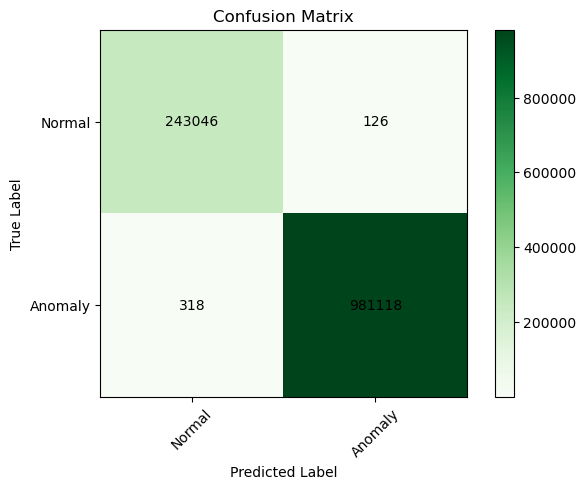

In [18]:
results = confusion_matrix(true_labels, pred_labels) 

print ('Confusion Matrix :')

def plot_confusion_matrix(cm, target_names, title='Confusion Matrix', cmap=plt.cm.Greens):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)
    plt.tight_layout()

    width, height = cm.shape

    for x in range(width):
        for y in range(height):
            plt.annotate(str(cm[x][y]), xy=(y, x), 
                        horizontalalignment='center',
                        verticalalignment='center')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')


plot_confusion_matrix(results, ['Normal','Anomaly'])

### Plotting ROC curve to furthur establish what our model predicts is infact proper and not an overfitted model

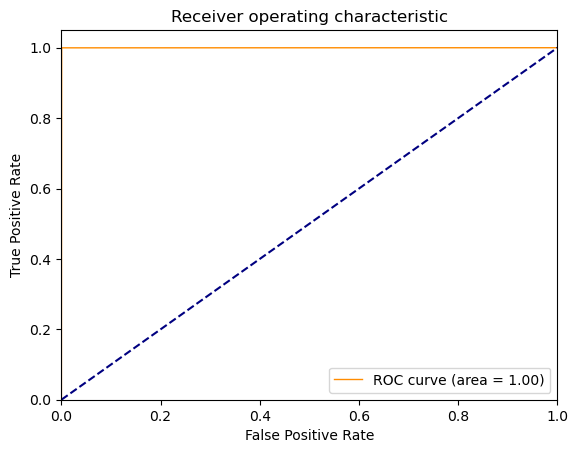

In [19]:
#AUC curve
fpr, tpr, thresholds = roc_curve(true_labels, pred_labels)
roc_auc = roc_auc_score(true_labels, pred_labels)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

### Feature imporatance from the XGBOOST model makes it evident that the source bytes from the signal is the main cause threat to the server which will be tagged as anomalies

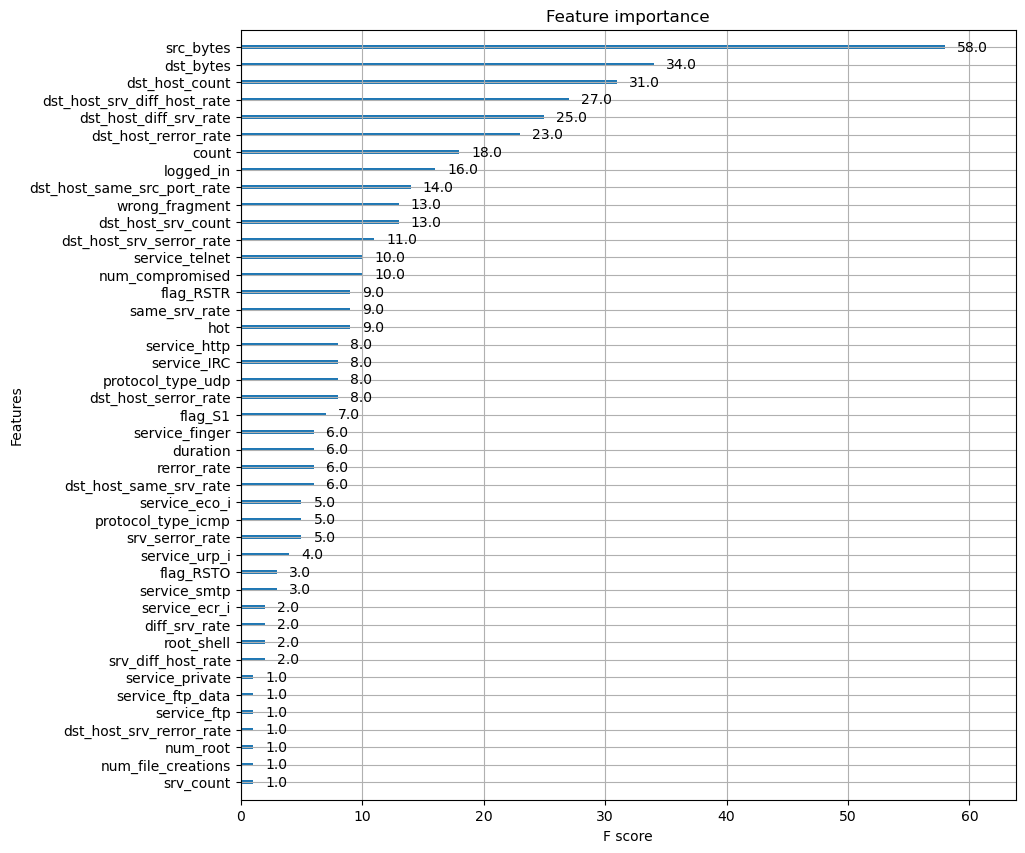

In [20]:
#Feature Importance
ax = xgb.plot_importance(model)
fig = ax.figure
fig.set_size_inches(10, 10)

# Handling Skewed Data of anomalies and making data as multi-class classification to find all the types of anomalies with the same accuracy as binary classifier

##### We will handle the imbalance in the data and see if the model performance can be better segregated across multiple classes giving us options for wide anomaly detections

In [21]:
def reduce_anomalies(df, pct_anomalies=.01):
    labels = df['label'].copy()
    is_anomaly = labels != 'normal.'
    num_normal = np.sum(~is_anomaly)
    num_anomalies = int(pct_anomalies * num_normal)
    all_anomalies = labels[labels != 'normal.']
    anomalies_to_keep = np.random.choice(all_anomalies.index, size=num_anomalies, replace=False)
    anomalous_data = df.iloc[anomalies_to_keep].copy()
    normal_data = df[~is_anomaly].copy()
    new_df = pd.concat([normal_data, anomalous_data], axis=0)
    return new_df

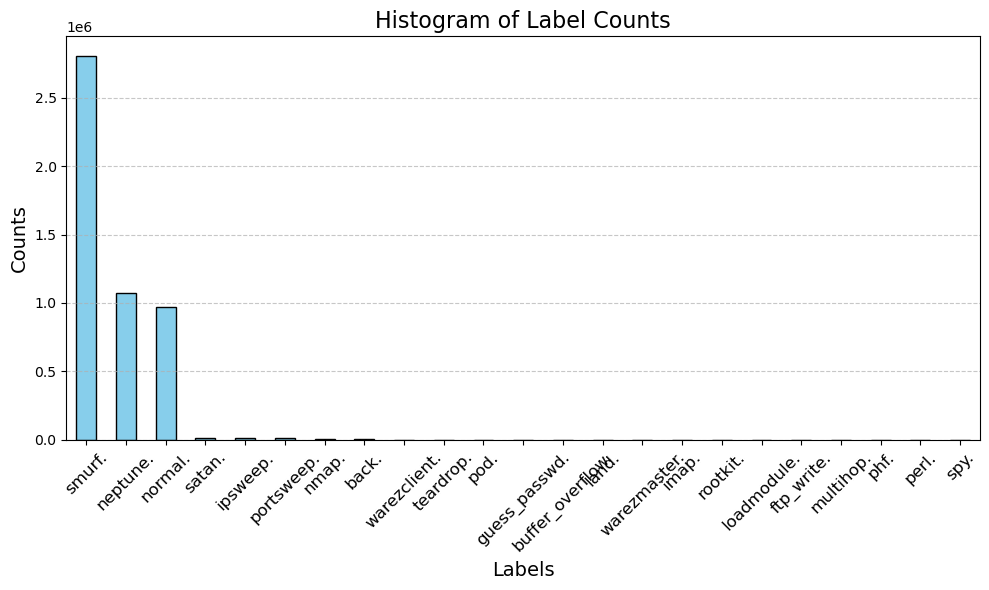

In [22]:
label_counts = df['label'].value_counts()
plt.figure(figsize=(10, 6))
label_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Adding labels and title
plt.title('Histogram of Label Counts', fontsize=16)
plt.xlabel('Labels', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

In [23]:
df['label'].value_counts()

label
smurf.              2807886
neptune.            1072017
normal.              972781
satan.                15892
ipsweep.              12481
portsweep.            10413
nmap.                  2316
back.                  2203
warezclient.           1020
teardrop.               979
pod.                    264
guess_passwd.            53
buffer_overflow.         30
land.                    21
warezmaster.             20
imap.                    12
rootkit.                 10
loadmodule.               9
ftp_write.                8
multihop.                 7
phf.                      4
perl.                     3
spy.                      2
Name: count, dtype: int64

In [25]:
df_skewed = reduce_anomalies(df)

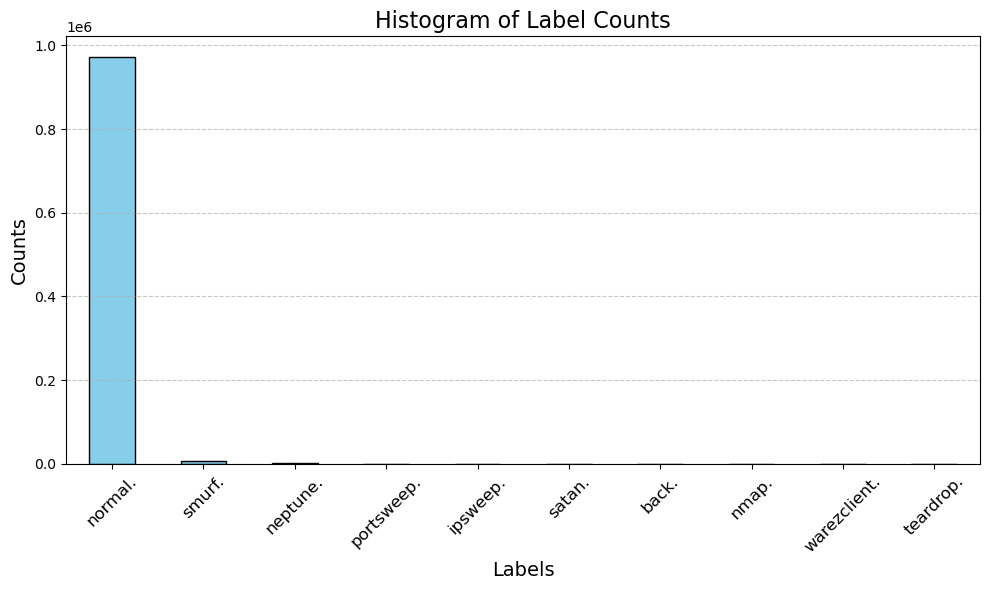

In [26]:
# After handling skew
label_counts = df_skewed['label'].value_counts()
plt.figure(figsize=(10, 6))
label_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Adding labels and title
plt.title('Histogram of Label Counts', fontsize=16)
plt.xlabel('Labels', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

In [27]:
pd.DataFrame(df_skewed['label'].value_counts())

,count
label,
normal.,972781
smurf.,6903
neptune.,2705
portsweep.,41
ipsweep.,34
satan.,28
back.,7
nmap.,6
warezclient.,2


In [28]:
# We will classifiy each individual anomalies with multi-class classifications

num_labels = len(le.classes_)
params['objective'] = 'multi:softprob'
params['num_class'] = num_labels
print(params)

{'num_rounds': 10, 'max_depth': 8, 'max_leaves': 256, 'alpha': 0.9, 'eta': 0.1, 'gamma': 0.1, 'learning_rate': 0.1, 'subsample': 1, 'reg_lambda': 1, 'scale_pos_weight': 2, 'tree_method': 'hist', 'device': 'cuda', 'n_gpus': 1, 'objective': 'multi:softprob', 'verbose': True, 'num_class': 23}


##### Handling catergorical and numerical data

In [29]:
cat_data = pd.get_dummies(df_skewed[cat_vars])

numeric_vars = list(set(df_skewed.columns.values.tolist()) - set(cat_vars))
numeric_vars.remove('label')
numeric_data = df_skewed[numeric_vars].copy()

numeric_cat_data = pd.concat([numeric_data, cat_data], axis=1)

##### Training with multiclass classification on a GPU

In [30]:
multi_labels = df_skewed['label'].copy()

integer_labels = le.transform(multi_labels)

x_train, x_test, y_train, y_test = train_test_split(numeric_cat_data,
                                                    integer_labels,
                                                    test_size=.25, 
                                                    random_state=42)

dtrain = xgb.DMatrix(x_train,label=y_train)
dtest = xgb.DMatrix(x_test,label=y_test)
evals = evals = [(dtest, 'test',), (dtrain, 'train')]
model = xgb.train(params,dtrain,params['num_rounds'],evals)

C:\Users\arun8\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:727: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
C:\Users\arun8\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:160: UserWarning: [10:26:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_gpus", "num_rounds", "scale_pos_weight", "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	test-mlogloss:2.03008	train-mlogloss:2.03008
[1]	test-mlogloss:1.66617	train-mlogloss:1.66616
[2]	test-mlogloss:1.41776	train-mlogloss:1.41776
[3]	test-mlogloss:1.22859	train-mlogloss:1.22859
[4]	test-mlogloss:1.07658	train-mlogloss:1.07657
[5]	test-mlogloss:0.95043	train-mlogloss:0.95043
[6]	test-mlogloss:0.84352	train-mlogloss:0.84351
[7]	test-mlogloss:0.75156	train-mlogloss:0.75155
[8]	test-mlogloss:0.67161	train-mlogloss:0.67161
[9]	test-mlogloss:0.60155	train-mlogloss:0.60154


In [31]:
#Testing the model
preds = model.predict(dtest)

In [32]:
pred_labels = np.argmax(preds, axis=1)
true_labels = y_test
print ('Accuracy Score :', accuracy_score(true_labels, pred_labels))

Accuracy Score : 0.9998656499489063


Confusion Matrix :


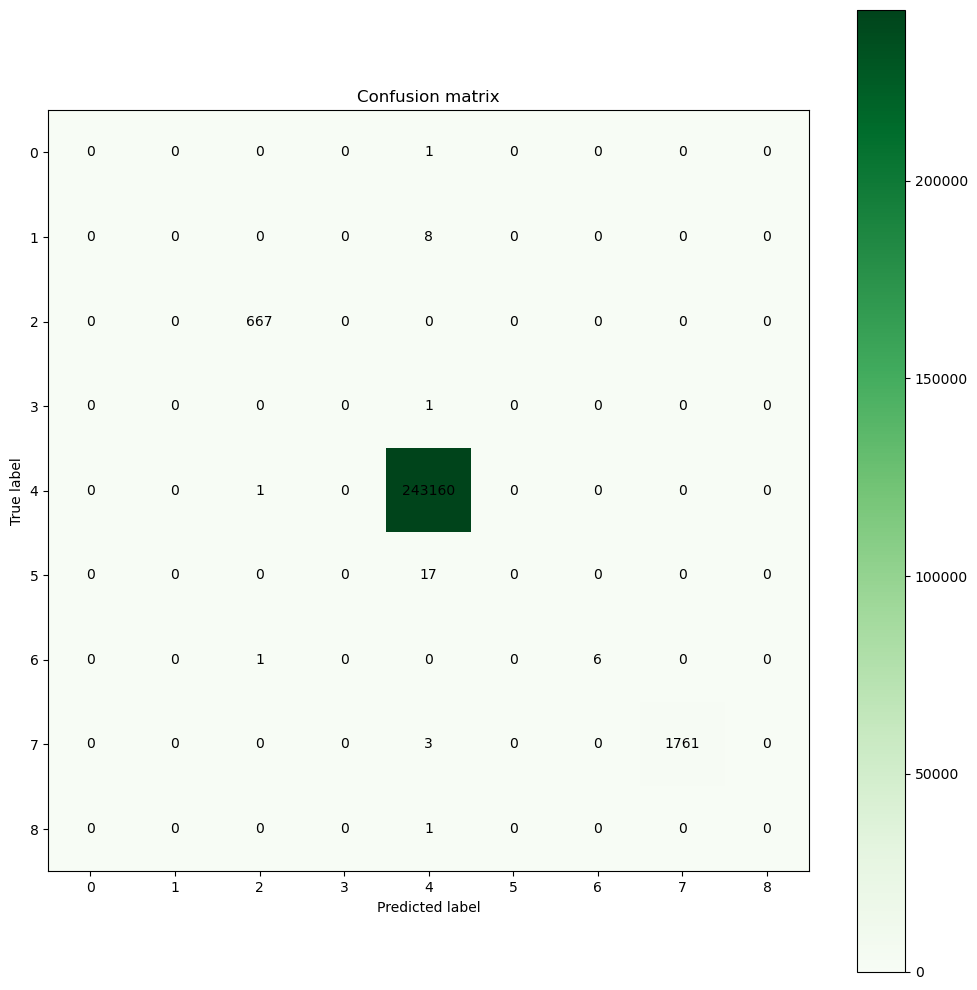

In [33]:
cm = confusion_matrix(true_labels, pred_labels)

print ('Confusion Matrix :')

def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Greens):
    plt.figure(figsize=(10,10),)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    
    #tick_marks = np.arange(len(target_names))
    #plt.xticks(tick_marks, target_names, rotation=45)
    #plt.yticks(tick_marks, target_names)
    plt.tight_layout()

    width, height = cm.shape

    for x in range(width):
        for y in range(height):
            plt.annotate(str(cm[x][y]), xy=(y, x), 
                        horizontalalignment='center',
                        verticalalignment='center')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

plot_confusion_matrix(cm)

## Conclusion

- As we saw in the binary and multi-class classification problems, XGBoost can be very effective at detecting anomalies when you have labeled data. We can furthur enhance these with Autoencoders and GANs for furthur imporvements

- GPU-Accelerating XGboost through RAPIDS is easy and fast.  The only change we had to make to use the GPU was to set the 'tree_method' parameter to 'gpu_hist'.